In [1]:
# To allow changes in .py files to be reflected in Notebook
%load_ext autoreload
%autoreload 2

In [2]:
# necessary anomaly imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from anomaly_intervalsStream import *
from anomaly8 import CollectiveAnomaly, PointAnomaly, SequentialAnomaly

In [3]:
# necessary anomaly imports
from stream import Stream
import arff

# replace filepath with local filepath for data
ECG1 = Stream('/Users/akankshanehete/Desktop/AnomalyDriftDetection/data/benchmark/ECG/MBA_ECG14046_data_1.arff')
ECG2 = Stream('/Users/akankshanehete/Desktop/AnomalyDriftDetection/data/benchmark/ECG/MBA_ECG14046_data_13.arff')
ECG3 = Stream('/Users/akankshanehete/Desktop/AnomalyDriftDetection/data/benchmark/ECG/MBA_ECG14046_data_15.arff')
#ECG1.to_arff(start=3500, end=6500)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


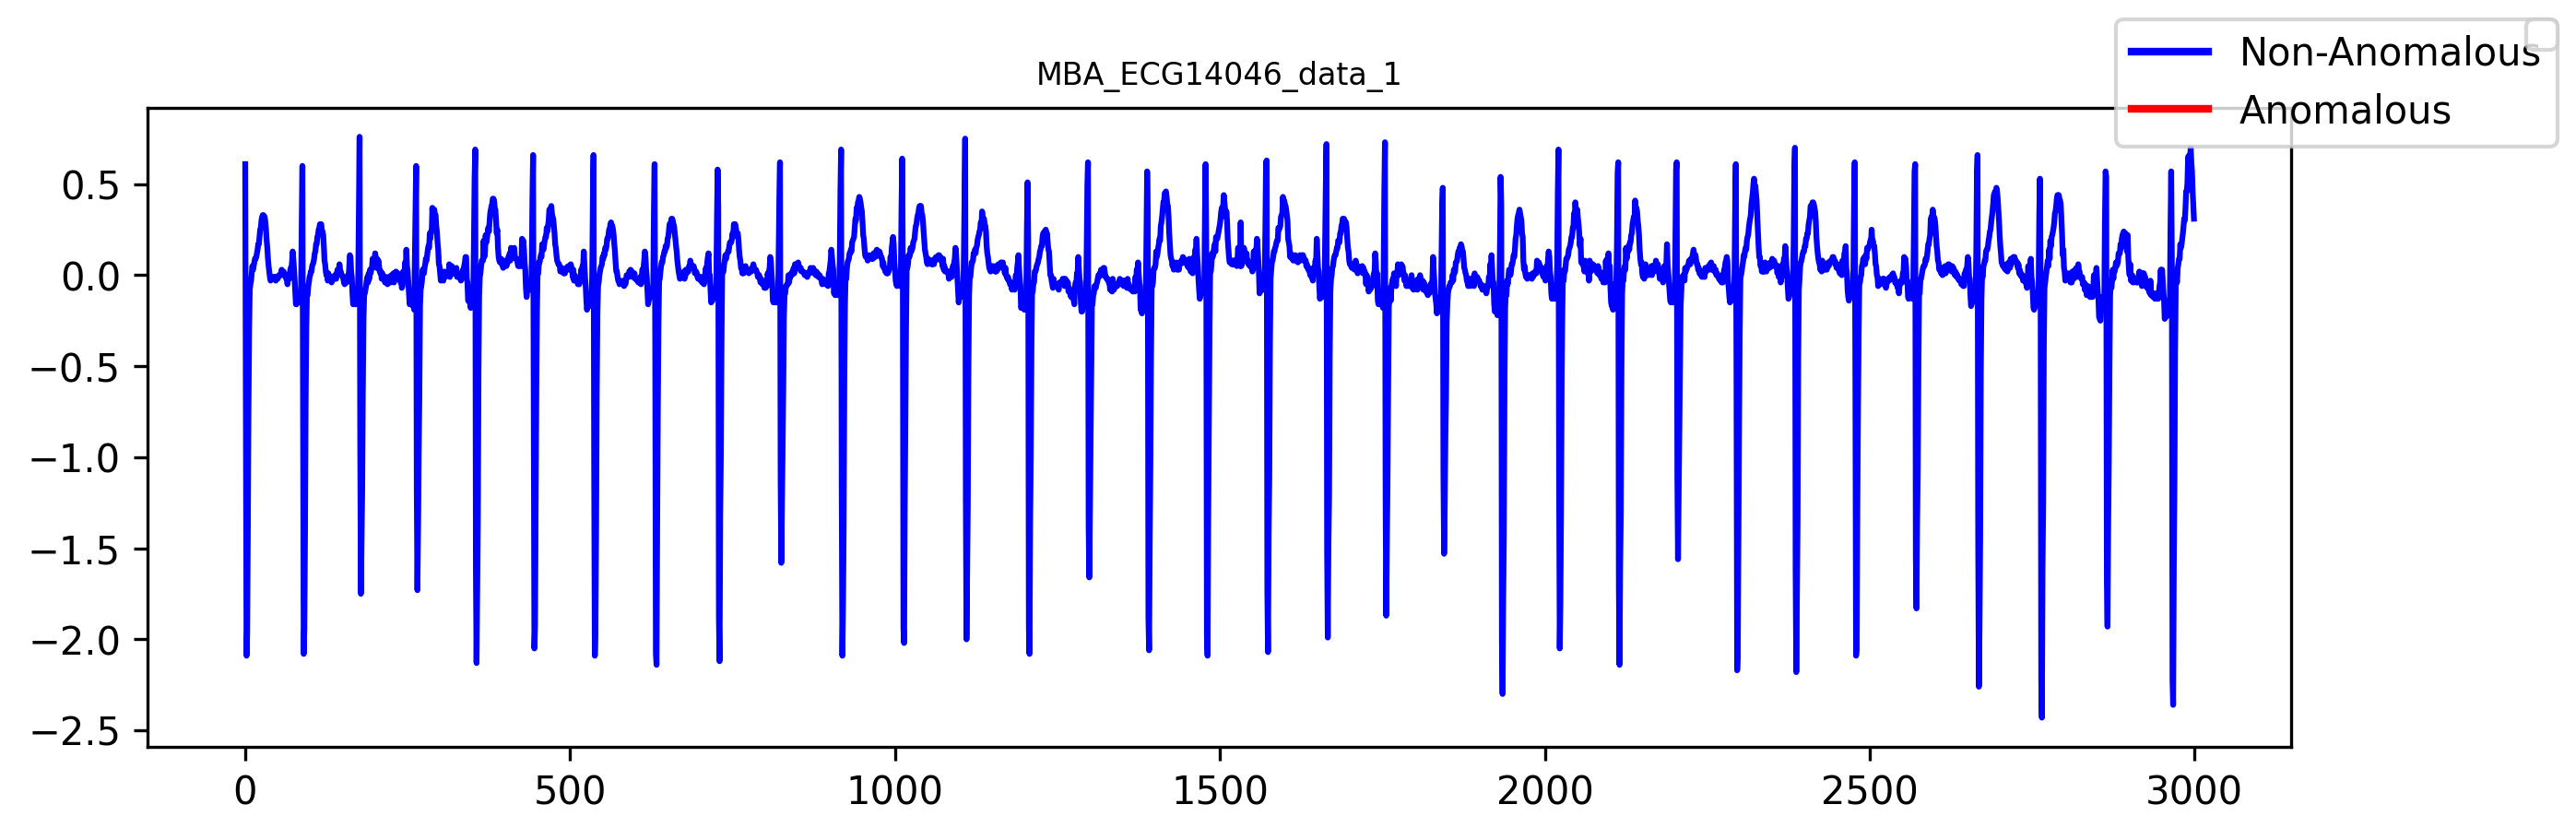

In [4]:
ECGtest = Stream('/Users/akankshanehete/Desktop/AnomalyDriftDetection/util/MBA_ECG14046_data_1.arff')
ECGtest.plot()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


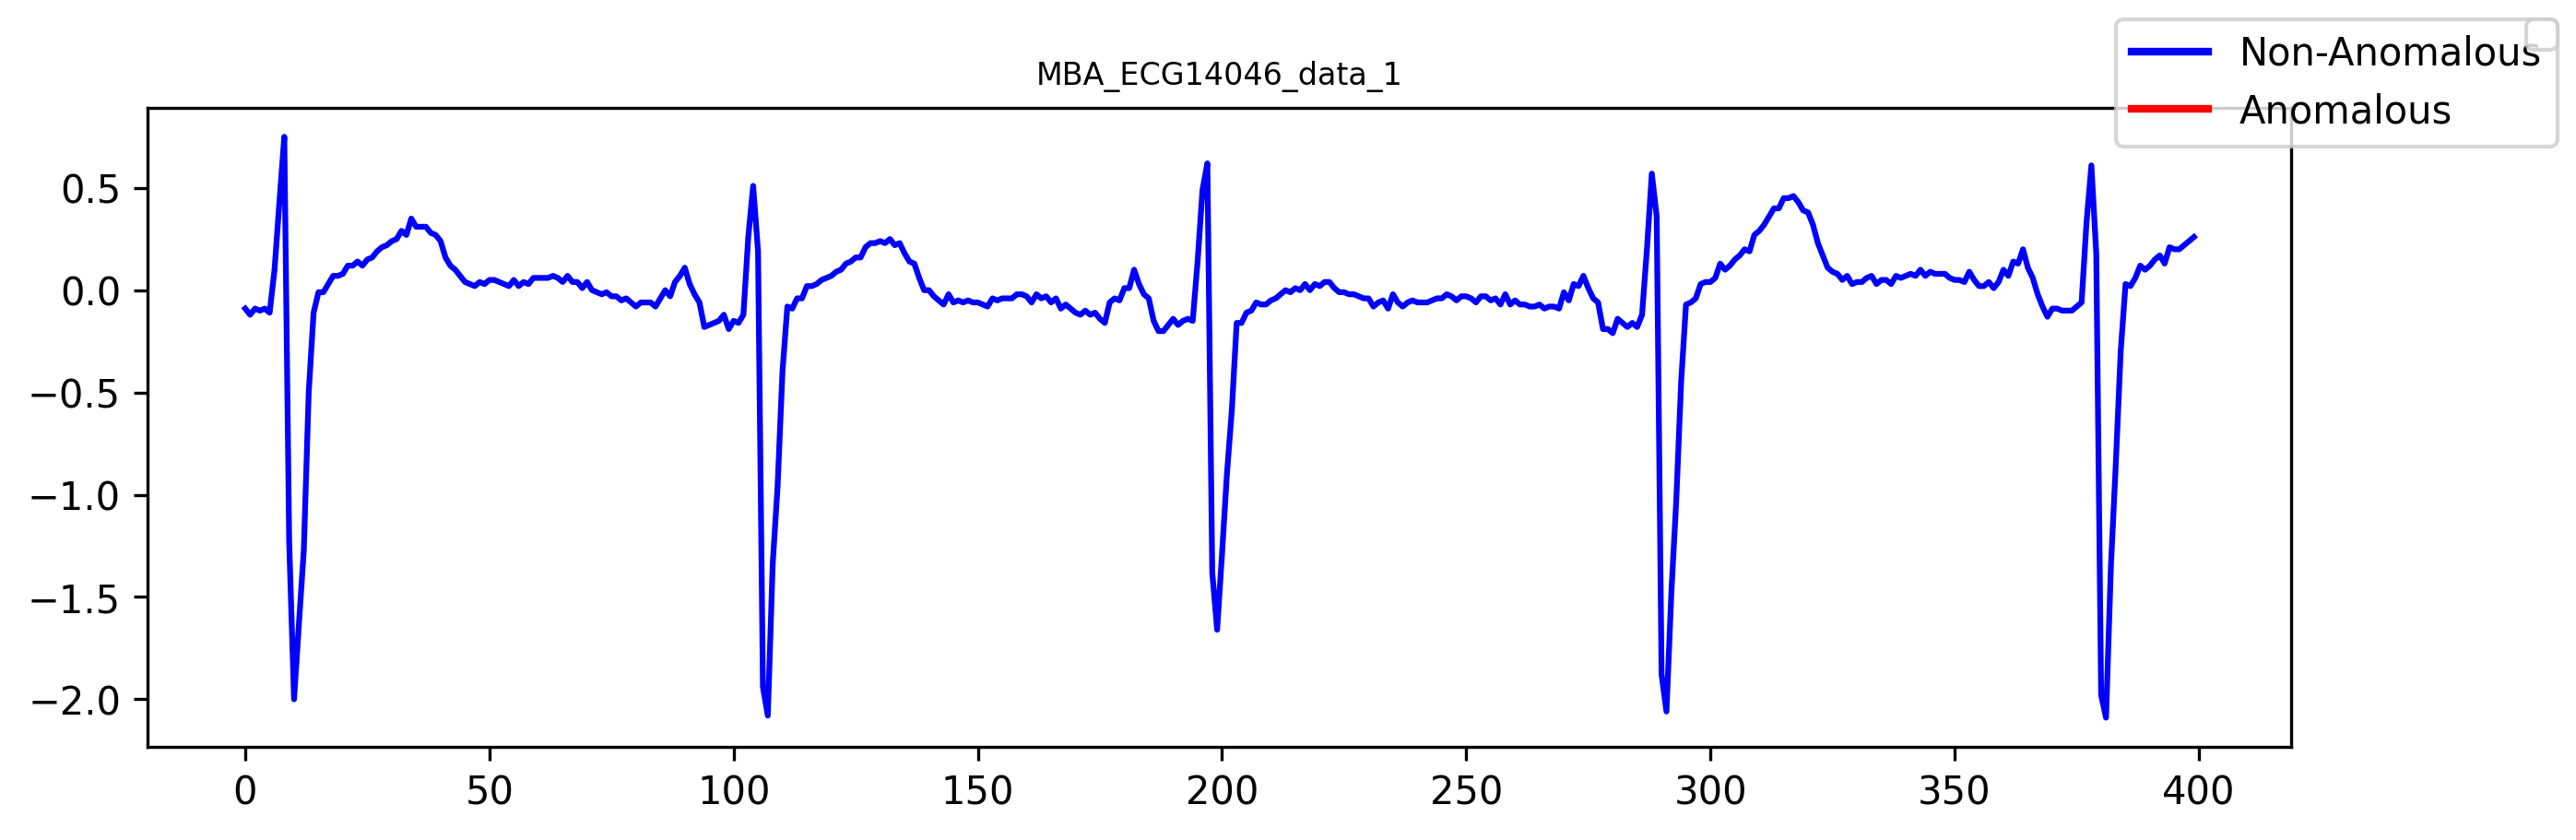

In [5]:
ECGtest.plot(start=1100, end=1500)

In [6]:
ECGtestanomalies = createAnomalyIntervals(ECGtest)




In [7]:
# creating point anomaly module with uniform distribution of values
pDistAnom1 = PointAnomaly(0.05, distribution='uniform', num_values=100, lowerbound=-1, upperbound=1) 
# creating point anomaly module with gaussian distribution of values
pDistAnom2 = PointAnomaly(0.05, distribution='gaussian', mu=1, std=0.5, num_values=20)
# creating point anomaly module with skew distribution of values
pDistAnom3 = PointAnomaly(0.002, distribution='skew', upperbound=2, skew=0.1)


In [8]:
pCollAnom1 = CollectiveAnomaly(5, 0.1, upperbound=2, lowerbound=0, num_values=50)
# creating point anomaly module with gaussian distribution of values
pCollAnom2 = CollectiveAnomaly(20, 0.04, upperbound=2, lowerbound=0.5, num_values=200)
# creating point anomaly module with skew distribution of values
pCollAnom3 = CollectiveAnomaly(100, 0.10, num_values=50, distribution='gaussian', mu=0.1, std=0.2)

In [9]:
pSeqAnom1 = SequentialAnomaly(0.10, 0.3, 3, length=15)

pSeqAnom2 = SequentialAnomaly(0.05, 0.5,1, length=30)

pSeqAnom3 = SequentialAnomaly(0.1, 0.1,1, length=50)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[   0. 1000. 2000. 3000.]
[(50.0, 950.0), (1050.0, 1950.0), (2050.0, 2950.0)]
Insertion Indexes:[350. 769.  98. 443. 892. 860. 679. 877. 704. 635. 809. 200. 622. 127.
 541. 312. 405. 492. 475. 943. 466. 132. 565. 504.  79. 291. 871. 295.
 217. 513. 657. 792. 936. 454. 155. 177. 748. 462. 752.  62. 155.  81.
 360. 400. 542.]
DATASET SLICE
(30, 1)
[ 0.06505934 -0.91765528 -0.57031322 -0.81802984 -1.51672439 -0.09021821
 -1.31272703 -0.53629151  0.14085921 -0.6283609  -0.73479639 -0.78749295
 -0.19312185 -1.64591442 -0.36333866 -1.19215654 -0.52206624 -0.44773927
 -0.67025889 -0.05952279 -0.36622091 -0.82911264 -0.51103815 -0.59302618
 -0.67083089 -1.12494949  0.45128805 -0.002957   -1.19029075 -1.36119673]
[-1.37494066 -2.35765528 -2.01031322 -2.25802984 -2.95672439 -1.53021821
 -2.75272703 -1.97629151 -1.29914079 -2.0683609  -2.17479639 -2.22749295
 -1.63312185 -3.08591442 -1.80333866 -2.63215654 -1.96206624 -1.88773927
 -2.11025889 -1.49952279 -1.80622091 -2.26911264 -1.95103815 -2.033

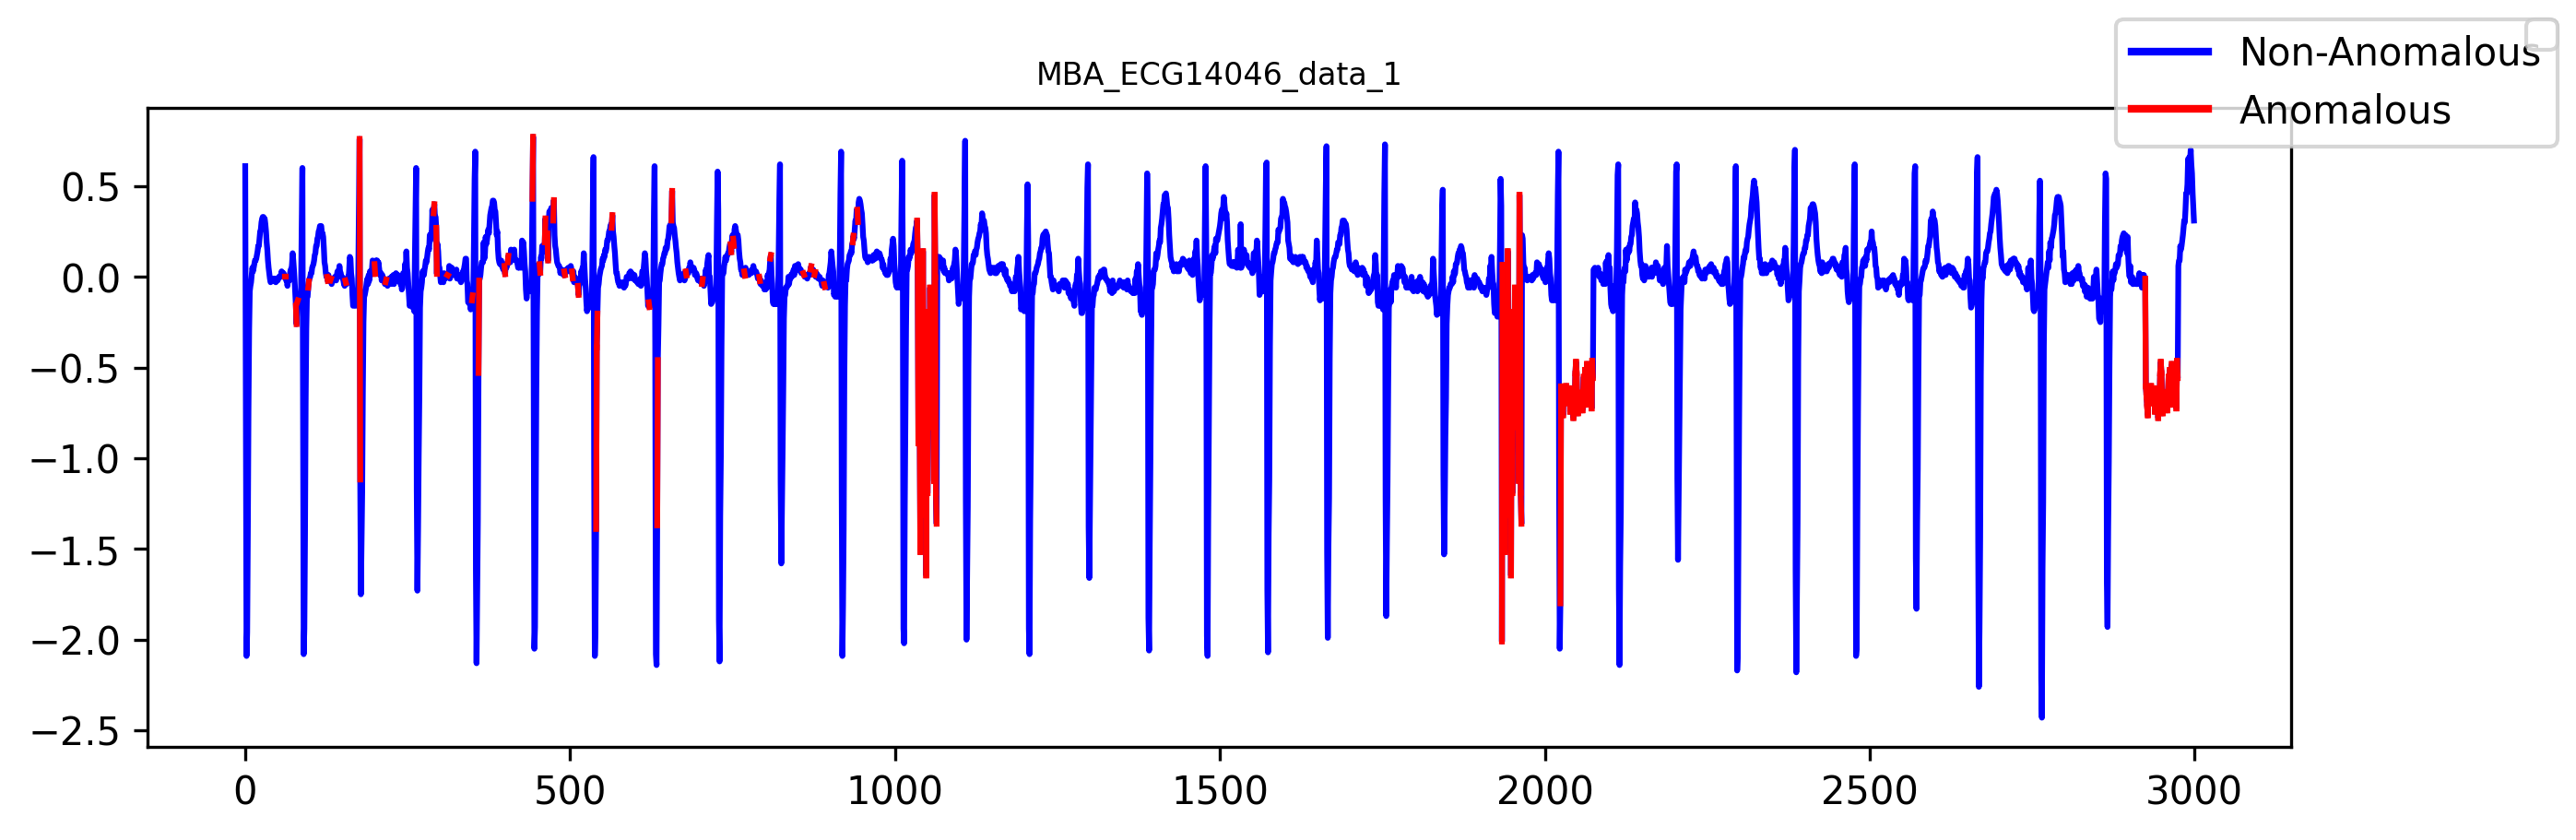

In [10]:
#IMPORTANT NOTE: gap size cannot exceed 1/2 interval size (no anomalies will be injected as interval size will be nonexistent)
ECGtestanomalies.create_intervals(3,100)
# add drift modules here corresponding to intervals
ECGtestanomalies.add_anomalies(pDistAnom1, pSeqAnom2, pSeqAnom3)
ECGtest.plot()

In [11]:
print(ECGtest.anomaly_labels[1891])
print(ECGtest.anomaly_intervals)



[0.]
[[62, 63], [79, 80], [81, 82], [98, 99], [127, 128], [132, 133], [155, 156], [177, 178], [200, 201], [217, 218], [291, 292], [295, 296], [312, 313], [350, 351], [360, 361], [400, 401], [405, 406], [443, 444], [454, 455], [462, 463], [466, 467], [475, 476], [492, 493], [504, 505], [513, 514], [541, 543], [565, 566], [622, 623], [635, 636], [657, 658], [679, 680], [704, 705], [748, 749], [752, 753], [769, 770], [792, 793], [809, 810], [860, 861], [871, 872], [877, 878], [892, 893], [936, 937], [943, 944], [1035, 1065], [1935, 1965], [2025, 2075], [2925, 2975]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


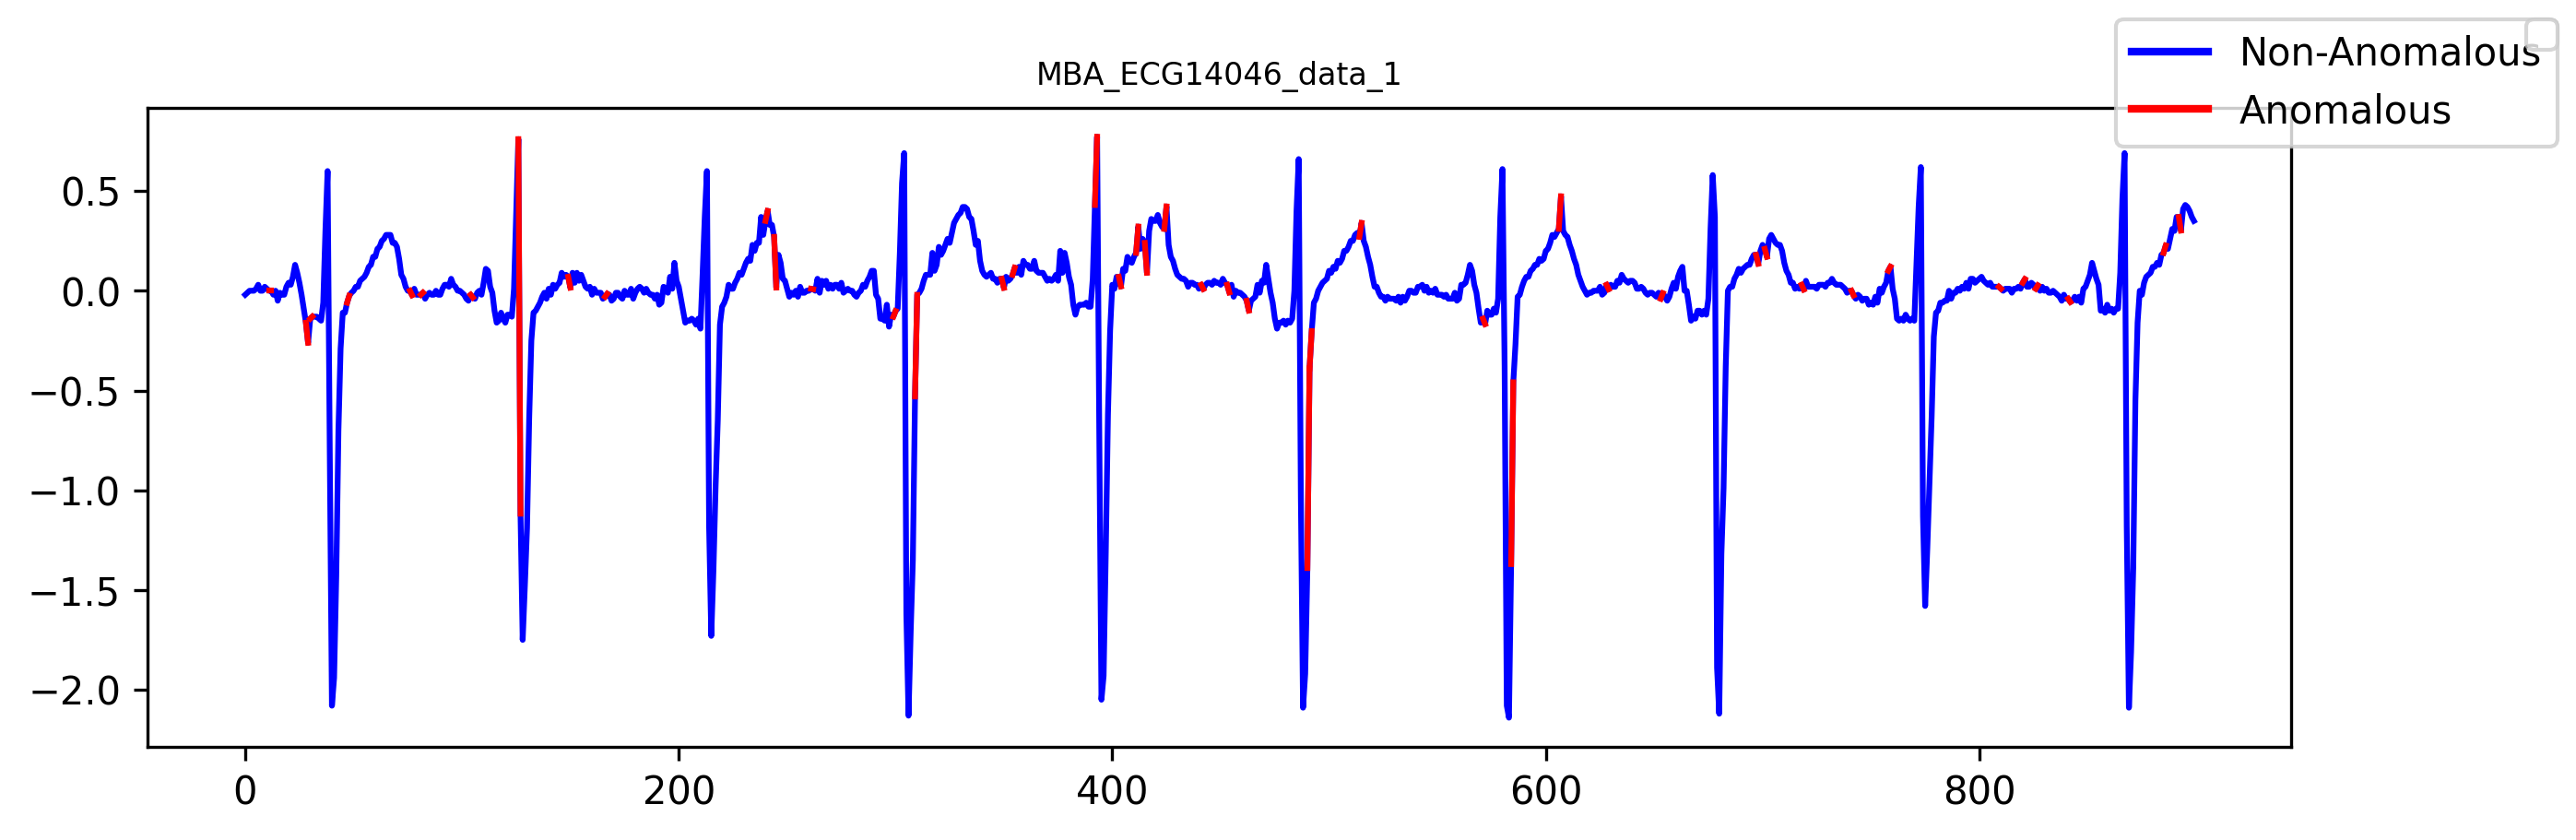

In [12]:
ECGtest.plot(start=50, end=950)